In [7]:
from main import ImportanceSampling
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import time

In [8]:
def main():
    quantile = 99.95
    sample_sizes = [5000,
                    10000,
                    50000,
                    100000]#,
                    #500000,
                    #1000000]
    shifts = np.linspace(0, 6, 7)
    shifts = np.sort(np.append(shifts, norm.ppf(quantile / 100.0)))
    sim_sizes = 10
    args = dict(quantile=quantile,
                sample_sizes=sample_sizes,
                shifts=shifts,
                sim_sizes=sim_sizes,
                pool_size=10)
    df = ImportanceSampling(**args).run()

    # Create a pivot table for plotting purposes
    aggfunc = {'std_true': np.sum}
    index = 'shift'          # x-axis
    columns = 'sample_size'  # legend
    values = aggfunc.keys()  # y-axis
    df_pivot = df.pivot_table(values=values, index=index, columns=columns, aggfunc=aggfunc)

    # Create a plot which displays the precision introduced by IS
    fig, ax = plt.subplots()
    ax.plot(df_pivot, '-o')
    ax.set_xlabel('Mean shift')
    ax.set_ylabel(f'Standard deviation (based on {sim_sizes} samples)')
    ax.set_title('Importance Sampling for various mean shifts and sample sizes')
    ax.set_ylim([0, 0.02])
    ax.grid(b=True)
    ax.legend(labels=sample_sizes, title='Sample size')
    fig.savefig('results.png')
    plt.show()
    plt.close(fig)

Sample size: 5000, Shift: 0.0, Sim size: 10, Sim time: 1.9164
Sample size: 5000, Shift: 1.0, Sim size: 10, Sim time: 1.8946
Sample size: 5000, Shift: 2.0, Sim size: 10, Sim time: 1.9074
Sample size: 5000, Shift: 3.0, Sim size: 10, Sim time: 1.9154
Sample size: 5000, Shift: 3.2905267314919255, Sim size: 10, Sim time: 1.9072
Sample size: 5000, Shift: 4.0, Sim size: 10, Sim time: 1.899
Sample size: 5000, Shift: 5.0, Sim size: 10, Sim time: 1.888
Sample size: 5000, Shift: 6.0, Sim size: 10, Sim time: 2.003
Sample size: 10000, Shift: 0.0, Sim size: 10, Sim time: 2.0142
Sample size: 10000, Shift: 1.0, Sim size: 10, Sim time: 2.0044
Sample size: 10000, Shift: 2.0, Sim size: 10, Sim time: 2.0934
Sample size: 10000, Shift: 3.0, Sim size: 10, Sim time: 2.0934
Sample size: 10000, Shift: 3.2905267314919255, Sim size: 10, Sim time: 2.1046
Sample size: 10000, Shift: 4.0, Sim size: 10, Sim time: 2.1041
Sample size: 10000, Shift: 5.0, Sim size: 10, Sim time: 2.0984
Sample size: 10000, Shift: 6.0, Sim 

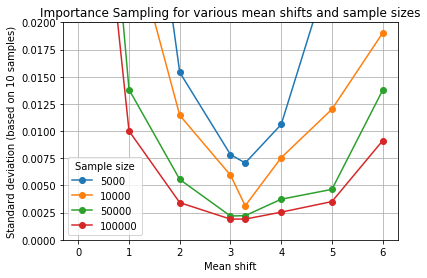

In [9]:
main()